In [55]:
import pandas
pandas.set_option("display.max_rows", 50, "display.max_columns", 50)

import pygsheets
import numpy
import scipy

import matplotlib
import matplotlib.pyplot as mp
import matplotlib.cm

#matplotlib.rcParams['font.family'] = 'Roboto'#'sans-serif'
#matplotlib.rcParams['font.sans-serif'] = ['Roboto']#,'Helvetica']
#matplotlib.rc('pdf', fonttype=42)
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['backend'] = 'Agg'
#matplotlib.use('cairo')

import textwrap
import seaborn

In [56]:
# solarized colors
solar_base03    = '#002b36' # darkest gray
solar_base02    = '#073642'
solar_base01    = '#586e75'
solar_base00    = '#657b83'
solar_base0     = '#839496' # light gray
solar_base1     = '#93a1a1' # lightest gray
solar_base2     = '#eee8d5' # dark white
solar_base3     = '#fdf6e3' # light white
solar_yellow    = '#b58900'
solar_orange    = '#cb4b16'
solar_red       = '#dc322f'
solar_magenta   = '#d33682'
solar_violet    = '#6c71c4'
solar_blue      = '#268bd2'
solar_cyan      = '#2aa198'
solar_green     = '#859900'

In [57]:
# GEM tracker colors
# done using this: https://imagecolorpicker.com/
tracker_construction = tracker_red     = '#cb4b16'
tracker_proposed = tracker_yellow  = '#ffb342'
tracker_shelved = tracker_blue    = '#609ed0'
tracker_operating = tracker_brown   = '#976f5d'
tracker_cancelled = tracker_green   = '#93db92'
tracker_mothballed = tracker_gray = '#515151'

#tracker_proposed = tracker_yellow
#tracker_construction = tracker_red
#tracker_shelved = tracker_blue
#tracker_operating = tracker_brown

import Pipelines_Current dataset

# import data

In [58]:
credentials_directory = '/Users/baird/Dropbox/_google-api/'
gc = pygsheets.authorize(client_secret=credentials_directory+'client_secret.json')
#spreadsheet = gc.open_by_key('1foPLE6K-uqFlaYgLPAUxzeXfDO5wOOqE7tibNHeqTek')
spreadsheet = gc.open_by_key('178YQvZ8EC17LYA8sIgsOEi5veROivWi_uUnPb6tOuzE')

#spreadsheet[1] "Gas Pipelines" tab is the second index
gas_pipes = spreadsheet[1].get_as_df(encoding='latin1')
oil_pipes = spreadsheet[2].get_as_df(encoding='latin1')
#owners = spreadsheet[2].get_as_df()

gas_pipes = gas_pipes.drop('WKTFormat', axis=1) # delete WKTFormat column
oil_pipes = oil_pipes.drop('WKTFormat', axis=1)

# delete columns that aren't the same in the sheets, to concatenate them...
columns_not_in_oil = list(set(gas_pipes.columns)-set(oil_pipes.columns))
columns_not_in_gas = list(set(oil_pipes.columns)-set(gas_pipes.columns))
gas_pipes.drop(columns=columns_not_in_oil, axis=1, inplace=True)
oil_pipes.drop(columns=columns_not_in_gas, axis=1, inplace=True)

pipes_df_orig = pandas.concat([oil_pipes, gas_pipes], ignore_index=True)
#pipes_df_orig = pipes_df_orig[pipes_df_orig['Status']!='N/A'] # for container rows
#pipes_df_orig = pipes_df_orig[pipes_df_orig['ProjectID']!=''] # for empty rows at bottom

#get other relevant sheets
country_ratios_df = spreadsheet[5].get_as_df(encoding='latin1')
owners_df = spreadsheet[3].get_as_df(encoding='latin1')
owners_df.set_index('ProjectID', inplace=True)

In [59]:
# set Brazil b/c pipelines equal to zero per Gregor's advice
pipes_df_orig
country_ratios_df

,PipelineName,SegmentName,ProjectID,Country,LengthEstimateKmByCountry,Status,Fuel,LengthEstimateKm,LengthPerCountryFraction,Owner,StartYearLatest,Region,PipelineBubbleRegion,BOEd,BOEdPerCountry,CostMergedUSD,CostMergedEuro,LengthKnownKm,LengthKnownKmByCountry,MergedKmByPipeline,CostMergedUSDPerKm,CostMergedEuroPerKm,MergedKmByCountry
0,Alberta Clipper Oil Pipeline,,P0001,Canada,"1,099.5",Operating,Oil,"1,790.0",0.7,Enbridge (100%),2010,North America,North America,"440,000.0","309,493.0",--,--,"1,790.0","1,259.1","1,790.0",--,--,"1,259.1"
1,Alberta Clipper Oil Pipeline,,P0001,USA,463.6,Operating,Oil,"1,790.0",0.3,Enbridge (100%),2010,North America,North America,"440,000.0","130,507.4",--,--,"1,790.0",530.9,"1,790.0",--,--,530.9
2,Athabasca Oil Pipeline,,P0002,Canada,418.1,Operating,Oil,542.0,1.0,Enbridge (100%),1999,North America,North America,"570,000.0","570,000.0",--,--,542.0,542.0,542.0,--,--,542.0
3,Bakken Oil Pipeline,,P0004,Canada,155.3,Operating,Oil,261.0,0.6,Enbridge (100%),2013,North America,North America,"145,000.0","85,901.4",--,--,261.0,154.6,261.0,--,--,154.6
4,Bakken Oil Pipeline,,P0004,USA,106.9,Operating,Oil,261.0,0.4,Enbridge (100%),2013,North America,North America,"145,000.0","59,098.7",--,--,261.0,106.4,261.0,--,--,106.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,Israel Natural Gas Transmission System,,P3658,Jordan,27.2,Operating,Gas,618.6,0.0,Israel Natural Gas Lines (INGL) (100%),2011,Middle East and North Africa,Middle East,--,--,--,--,--,--,618.6,--,--,27.2
3882,Arish–Port Said Gas Pipeline,,P3659,Egypt,243.4,Operating,Gas,243.4,1.0,Egyptian Natural Gas Holding Company,--,Middle East and North Africa,Middle East,--,--,--,--,--,--,243.4,--,--,243.4
3883,Roma to Brisbane Pipeline,Peat Lateral,P3660,Australia,118.5,Operating,Gas,121,1.0,--,--,Australia and New Zealand,Asia Pacific,--,--,--,--,121.0,121.0,121.0,--,--,121.0
3884,Telfer Pipeline,Nifty Gas Lateral,P3661,Australia,44.9,Operating,Gas,45,1.0,--,--,Australia and New Zealand,Asia Pacific,--,--,--,--,45.0,45.0,45.0,--,--,45.0


In [60]:
pipes_df_orig.columns

Index(['PipelineNetworkContainer', 'PipelineName', 'SegmentName', 'Wiki',
       'ProjectID', 'Fuel', 'Countries', 'Researcher', 'LastUpdated', 'Status',
       'Parent', 'ProposalYear', 'ConstructionYear', 'StartYear1',
       'StartYear2', 'StartYear3', 'Delayed', 'DelayType', 'StartYearEarliest',
       'ShelvedYear', 'CancelledYear', 'StopYear', 'ShelvedCancelledType',
       'Capacity', 'CapacityUnits', 'CapacityBcm/y', 'CapacityBOEd',
       'LengthKnown', 'LengthKnownUnits', 'LengthKnownKm', 'LengthEstimateKm',
       'LengthMergedKm', 'Diameter', 'DiameterUnits', 'Source',
       'StartLocation', 'StartPrefecture/District', 'StartState/Province',
       'StartCountry', 'StartRegion', 'EndLocation', 'EndPrefecture/District',
       'EndState/Province', 'EndCountry', 'EndRegion', 'NumberOfCountries',
       'CostOld', 'CostOldUnits', 'CostOldUSD', 'CostEst', 'CostEstUnits',
       'CostEstYear', 'CostEstUSD', 'CostActual', 'CostActualUnits',
       'CostActualYear', 'CostActualUS

In [61]:
routes_to_zero_out = [
    'Route 4b Gas Pipeline',
    'Route 5b Gas Pipeline',
    'Route 5c Gas Pipeline',
    'Route 6b Gas Pipeline' ]

#routes_to_zero_out = []

cols_to_zero_out = ['LengthMergedKm']
pipes_df_orig.loc[pipes_df_orig['PipelineName'].isin(routes_to_zero_out), cols_to_zero_out] = numpy.nan

cols_to_zero_out = ['MergedKmByCountry']
country_ratios_df.loc[country_ratios_df['PipelineName'].isin(routes_to_zero_out), cols_to_zero_out] = numpy.nan

## replace "--" with NaN, removing empty rows

In [62]:
# replace -- entries with NaN
pipes_df_orig = pipes_df_orig.replace('--', numpy.nan)
pipes_df_orig = pipes_df_orig[pipes_df_orig['PipelineName']!='']

In [63]:
pipes_df_orig[pipes_df_orig['Fuel']=='Gas']['LengthMergedKm'].sum()

1253487.5799999998

In [64]:
country_ratios_df['StartYearLatest'].replace('--', numpy.nan, inplace=True)
country_ratios_df['LengthKnownKm'].replace('--', numpy.nan, inplace=True)
country_ratios_df['CostMergedUSD'].replace('--', numpy.nan, inplace=True)
country_ratios_df['CostMergedUSDPerKm'].replace('--', numpy.nan, inplace=True)
country_ratios_df['LengthKnownKmByCountry'].replace('--', numpy.nan, inplace=True)

# km by country, km by region calculations

In [65]:
status_list = ['Proposed', 'Construction', 'Shelved', 'Cancelled', 'Operating', 'Idle', 'Mothballed', 'Retired']
country_list = sorted(list(set(country_ratios_df['Country'])))
region_list = sorted(list(set(country_ratios_df['Region'])))

In [66]:
country_ratios_gas_df = country_ratios_df[country_ratios_df['Fuel']=='Gas']

km_by_country_df = pandas.DataFrame(columns=status_list, index=country_list)
km_by_region_df = pandas.DataFrame(columns=status_list, index=region_list)

print('===country-level calculations===')
for status in status_list:
    print(status)
    country_ratios_gas_df_status = country_ratios_gas_df[country_ratios_gas_df['Status']==status]
    km_by_country_df[status] = country_ratios_gas_df_status.groupby('Country')['MergedKmByCountry'].sum()

print('===regional calculations===')
for status in status_list:
    print(status)
    country_ratios_gas_df_status = country_ratios_gas_df[country_ratios_gas_df['Status']==status]
    km_by_region_df[status] = country_ratios_gas_df_status.groupby('Region')['MergedKmByCountry'].sum()

# # fill NaN with 0.0
km_by_region_df = km_by_region_df.fillna(0)
km_by_country_df = km_by_country_df.fillna(0)

===country-level calculations===
Proposed
Construction
Shelved
Cancelled
Operating
Idle
Mothballed
Retired
===regional calculations===
Proposed
Construction
Shelved
Cancelled
Operating
Idle
Mothballed
Retired


In [67]:
km_by_region_df['Proposed+Construction'] = km_by_region_df[['Proposed','Construction']].sum(axis=1)
km_by_region_df.sort_values(by='Proposed+Construction', inplace=True)
km_by_region_df = km_by_region_df[['Proposed', 'Construction', 'Proposed+Construction', 'Shelved', 'Cancelled', 'Operating', 'Idle', 'Mothballed', 'Retired']]
km_by_region_df.sort_values('Proposed+Construction', ascending=False, inplace=True)

In [68]:
km_by_country_df['Proposed+Construction'] = km_by_country_df[['Proposed','Construction']].sum(axis=1)
km_by_country_df.sort_values(by='Proposed+Construction', inplace=True)
km_by_country_df = km_by_country_df[['Proposed', 'Construction', 'Proposed+Construction', 'Shelved', 'Cancelled', 'Operating', 'Idle', 'Mothballed', 'Retired']]
km_by_country_df.sort_values('Proposed+Construction', ascending=False, inplace=True)

## add Total row to km by country/region

# numbers of pipes finished in a given year

In [69]:
pipes_started = pipes_df_orig.copy()
pipes_started['StartYearEarliest'].replace(numpy.nan,'',inplace=True)
pipes_started = pipes_started[(pipes_started['Status'].isin(['Operating'])) &
                              (pipes_started['Fuel']=='Gas')]
pipes_started_sum = pipes_started.groupby('StartYearEarliest')['LengthMergedKm'].sum()

In [70]:
pipes_started_startyear = pipes_df_orig.copy()
pipes_started_startyear['StartYearEarliest'].replace(numpy.nan,'',inplace=True)
pipes_started_startyear = pipes_started_startyear[(pipes_started_startyear['Status'].isin(['Operating'])) &
                              (pipes_started_startyear['Fuel']=='Gas')]
#pipes_started_startyear_sum = pipes_started_startyear.groupby('StartYearLatest')['LengthMergedKm'].sum()

In [71]:
pipes_indev = pipes_df_orig.copy()
pipes_indev = pipes_indev[pipes_indev['Fuel']=='Gas']
pipes_indev = pipes_indev.groupby('Status')['LengthMergedKm'].sum()

In [72]:
pipes_indev_to2030 = pipes_df_orig.copy()
pipes_indev_to2030 = pipes_indev_to2030[(pipes_indev_to2030['Fuel']=='Gas') &
                                        (pipes_indev_to2030['Status'].isin(['Proposed','Construction','Shelved'])) &
                                        (pipes_indev_to2030['StartYearEarliest'].isin(list(range(2023,2031))))]
pipes_indev_to2030 = pipes_indev_to2030.groupby('Status')['LengthMergedKm'].sum()

In [73]:
pipes_indev_startyear = pipes_df_orig.copy()
pipes_indev_startyear = pipes_indev_startyear[(pipes_indev_startyear['Status'].isin(['Proposed','Construction','Shelved'])) &
                                              (pipes_indev_startyear['Fuel']=='Gas')]
pipes_indev_startyear = pipes_indev_startyear.groupby(['Status','StartYearEarliest'])['LengthMergedKm'].sum()

## 2016 onward plots

## 2016 onwards with 2022, 2023 labeled

## Ted's preference for 2016 onwards (lump 2022 into other stuff?)

## james' preference (same y-axis)

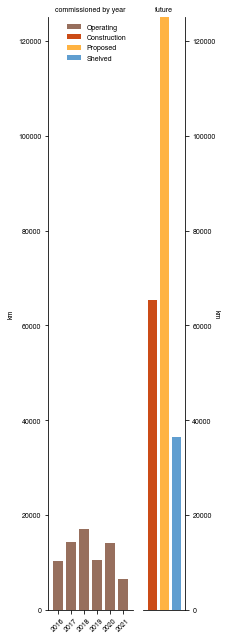

In [74]:
font_size = 7

ytop = 125000
ytop2 = 125000

fig = mp.figure(figsize=(3.25,9))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)

ax = fig.add_subplot(spec[0,0])

#axpos = ax.get_position()
ax.bar(pipes_started_sum.index.values[-7:-1], pipes_started_sum.values[-7:-1],
       color=tracker_operating, label='Operating') # color=solar_base03
ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
#ax2pos = ax2.get_position()
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, pipes_indev[s],
             color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

#ax2.set_xlabel('possible\nfuture', size=font_size)
#ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90)
ax2.yaxis.set_label_position('right')
#ax2.set_yticklabels([])
#ax2.set_yticks([])

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

fig.tight_layout()#w_pad=0.05)
#fig.subplots_adjust(wspace=0.05, hspace=None)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-without-2022.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-without-2022.pdf', bbox_inches='tight', transparent=True)

## Fig 2 again - 2023–2030, go back to 2008

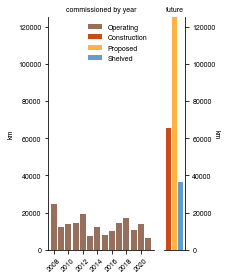

In [75]:
font_size = 7

ytop = 125000
ytop2 = 125000

fig = mp.figure(figsize=(3.25,4))

widths=[15,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)

ax = fig.add_subplot(spec[0,0])

#axpos = ax.get_position()
ax.bar(pipes_started_sum.index.values[-15:-1], pipes_started_sum.values[-15:-1],
       color=tracker_operating, label='Operating') # color=solar_base03
ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2007.25, 2021.75)
ax.set_ylim(0, ytop)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
#ax2pos = ax2.get_position()
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, pipes_indev[s],
             color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

#ax2.set_xlabel('possible\nfuture', size=font_size)
#ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90)
ax2.yaxis.set_label_position('right')
#ax2.set_yticklabels([])
#ax2.set_yticks([])

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

fig.tight_layout()#w_pad=0.05)
#fig.subplots_adjust(wspace=0.05, hspace=None)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-backto2008.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-backto2008.pdf', bbox_inches='tight', transparent=True)

## plus/minus 8 years

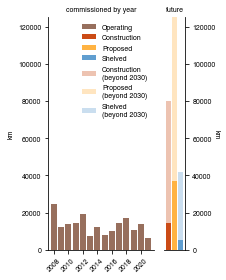

In [76]:
font_size = 7

ytop = 125000
ytop2 = 125000

fig = mp.figure(figsize=(3.25,4))

widths=[15,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)

ax = fig.add_subplot(spec[0,0])

#axpos = ax.get_position()
ax.bar(pipes_started_sum.index.values[-15:-1], pipes_started_sum.values[-15:-1],
       color=tracker_operating, label='Operating') # color=solar_base03
ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2007.25, 2021.75)
ax.set_ylim(0, ytop)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
#ax2pos = ax2.get_position()
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
status_alt = ['Construction\n(beyond 2030)', 'Proposed\n(beyond 2030)', 'Shelved\n(beyond 2030)']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, pipes_indev_to2030[s],
             color=c, label=s))

for x,c,s,s_alt in zip(xvals,colors,status,status_alt):
    ax2_list.append(ax2.bar(x, pipes_indev[s], bottom=pipes_indev_to2030[s],
             color=c, label=s_alt, alpha=0.333))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

#ax2.set_xlabel('possible\nfuture', size=font_size)
#ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90)
ax2.yaxis.set_label_position('right')
#ax2.set_yticklabels([])
#ax2.set_yticks([])

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

fig.tight_layout()#w_pad=0.05)
#fig.subplots_adjust(wspace=0.05, hspace=None)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-plusminus-8yrs.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-plusminus-8yrs.pdf', bbox_inches='tight', transparent=True)

## percent pipelines with start date

In [77]:
pipes_scratch = pipes_df_orig.copy()
pipes_scratch = pipes_scratch[(pipes_scratch['Fuel']=='Gas') &
                              (pipes_scratch['Status'].isin(['Proposed','Construction','Shelved']))]

In [78]:
pipes_scratch.shape

(633, 75)

In [79]:
pipes_scratch[~pipes_scratch['StartYearEarliest'].isnull()]['StartYearEarliest'].count()/pipes_scratch.shape[0]





0.5671406003159558

## Fig 2 again, horizontal lines instead of bars

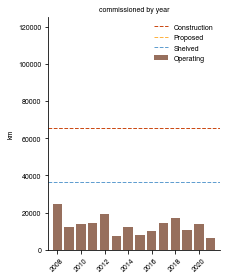

In [80]:
font_size = 7

ytop = 125000
ytop2 = 125000

fig = mp.figure(figsize=(3.25,4))

widths=[1]
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths)

ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum.index.values[-15:-1], pipes_started_sum.values[-15:-1],
       color=tracker_operating, label='Operating') # color=solar_base03
ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2007.25, 2021.75)
ax.set_ylim(0, ytop)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax_hline_list = []
colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
for x,c,s in zip(xvals,colors,status):
    ax_hline_list.append(ax.axhline(y=pipes_indev[s],
             color=c, label=s, linewidth=1, linestyle='--'))


ax_h, ax_l = ax.get_legend_handles_labels()
#ax2_h, ax2_l = ax2.get_legend_handles_labels()
ax.legend(handles=ax_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)

fig.tight_layout()#w_pad=0.05)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-backto2008-hlines.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-backto2008-hlines.pdf', bbox_inches='tight', transparent=True)

## regional pipelines started in given year

In [81]:
years_array = numpy.arange( float(pipes_df_orig['StartYearEarliest'].min()), float(pipes_df_orig['StartYearEarliest'].max())+1)
regions_startyear_sums_df = pandas.DataFrame(numpy.nan, index=years_array, columns=region_list)

In [82]:
#pipes_started = pipes_df.copy()[(pipes_df['Status'].isin(['Operating'])) & pipes_df['Fuel']=='Gas']
#pipes_started_sum = pipes_started.groupby('StartYearLatest')['LengthMergedKm'].sum()

for region in region_list:
    pipes_started = pipes_df_orig.copy()[(pipes_df_orig['Status'].isin(['Operating','Retired','Idle'])) & 
                                    (pipes_df_orig['Fuel']=='Gas')]
    pipes_started = pipes_started[pipes_started['StartRegion']==region]
    pipes_started_sum = pipes_started.groupby('StartYearEarliest')['LengthMergedKm'].sum()
    
    regions_startyear_sums_df[region] = pipes_started_sum

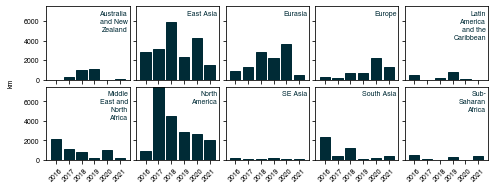

In [83]:
font_size = 7

fig = mp.figure(figsize=(6.75,2.75))#, constrained_layout=True)

start_year = 2016
end_year = 2021
ax_list = []

# plot the regional trends
for idx,region in enumerate(region_list):
    ax = fig.add_subplot(2,5,idx+1)
    
    ax_list.append(ax)
    ax.bar(numpy.arange(start_year,end_year+1), 
           regions_startyear_sums_df.loc[list(numpy.arange(start_year,end_year+1))][region].values,
           color=solar_base03, edgecolor=solar_base03)

    ax.set_xlim(2015.25, 2021.75)
    ax.set_ylim(0, 7500)#numpy.nanmean(regions_startyear_sums_df[region].values[:-1])*3)

    ax.text(x=0.98, y=0.95, s=('\n').join(textwrap.wrap(region, 10)), transform=ax.transAxes, c=solar_base03, 
            size=font_size, ha='right', va='top')
    
    ax.tick_params(labelsize=font_size)
    ax.tick_params('x', rotation=45)
    ax.set_xticks([2016,2017,2018,2019,2020,2021])
    
    if idx not in [0,5]:
        ax.set_yticklabels([])
    if idx<5:
        ax.set_xticklabels([])

#ax.set_title('gas pipelines (km) by start year', size=font_size)
fig.tight_layout(h_pad=0.25, w_pad=0.25)

ax1 = ax_list[0]
ax6 = ax_list[5]
ax1pos = ax2.get_position()
ax6pos = ax6.get_position()
fig.text(-0.005, ax6pos.y0+(ax1pos.y1-ax6pos.y0)/2,
         'km',
         size=font_size, ha='center', rotation=90)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_regional-km-by-start-year.png', 
           bbox_inches='tight', 
           transparent=True, 
           dpi=600)

## plot regional Proposed and Construction bar plots

## plot pie chart of regional values

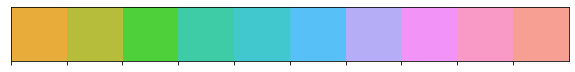

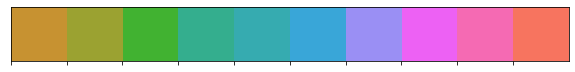

In [84]:
#seaborn.color_palette('husl', 10)
seaborn.palplot(seaborn.husl_palette(10, s=0.9, l=0.75, h=0.15))
seaborn.palplot(seaborn.husl_palette(10, h=0.15))

cmap_dark = seaborn.husl_palette(10, h=0.15, l=0.4, s=0.8, as_cmap=True)
cmap_light = seaborn.husl_palette(10, h=0.15, s=1, as_cmap=True)

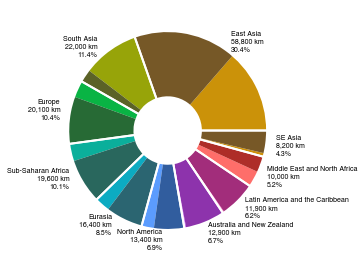

In [85]:
font_size=7

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

nwedges = region_list.__len__()
region_order = km_by_region_df.index[:nwedges]

pie_vals = km_by_region_df.loc[region_order]['Proposed+Construction'].values
pie_labels = km_by_region_df.index
pie_labels_km = km_by_region_df.loc[region_order]['Proposed+Construction'].apply(lambda x: f'\n{int(round(x,-2)):,} km')
pie_labels_perc = (km_by_region_df.loc[region_order]['Proposed+Construction'] / 
                   km_by_region_df.loc[region_order]['Proposed+Construction'].sum() * 100.).apply(lambda x: f'\n{x:.1f}%')

# ****************************************
pie_vals_separated = km_by_region_df.loc[region_order][['Construction','Proposed']].values.flatten()
#pie_labels_separated = numpy.array(list(zip(km_by_region_df.index[:-1],km_by_region_df.index[:-1]))).flatten()
#pie_labels_km = km_by_region_df.loc[region_order]['Proposed+Construction'].apply(lambda x: f'\n{int(round(x,-3)):,} km')

nwedges_separated = 20
cmap_light_10 = cmap_light(numpy.linspace(0,1,nwedges))
cmap_dark_10 = cmap_dark(numpy.linspace(0,1,nwedges))

pie_labels = [i+j+k for i,j,k in zip(pie_labels, pie_labels_km, pie_labels_perc)]
pie_width = 0.666

# ****************************************
# size=0.3
ax.pie(pie_vals_separated, 
       #labels=pie_labels,
       #radius=1-size,
       colors=numpy.hstack((cmap_light_10, cmap_dark_10)).reshape(20,-1),
       wedgeprops=dict(width=pie_width),
       textprops={'fontsize': font_size})
ax.pie(pie_vals, 
       labels=pie_labels,
       #radius=1,
       #bottom=0.25,
       colors=None,#cmap(numpy.linspace(0,1,pie_vals.size))[::-1],
       wedgeprops=dict(edgecolor='1', facecolor='None', linewidth=2, width=pie_width),
       textprops={'fontsize': font_size})


ax.tick_params(labelsize=font_size)

fig.tight_layout()

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_pie-graph-country-pipelines-km.pdf', bbox_inches='tight', transparent=True)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_pie-graph-country-pipelines-km.png', 
           bbox_inches='tight', 
           transparent=True,
           dpi=600)


### calculating percents for James

In [109]:
pie_vals = km_by_region_df.loc[region_order]['Proposed+Construction'].values
pie_labels = km_by_region_df.index
pie_labels_km = km_by_region_df.loc[region_order]['Proposed+Construction'].apply(lambda x: f'\n{int(round(x,-2)):,} km')

for region in region_order:
    print(region)
    prop_perc = km_by_region_df.loc[region]['Proposed']/km_by_region_df.loc[region]['Proposed+Construction'] *100.
    prop_perc = '{:.1f}%'.format(prop_perc)
    const_perc = km_by_region_df.loc[region]['Construction']/km_by_region_df.loc[region]['Proposed+Construction'] * 100.
    const_perc = '{:.1f}%'.format(const_perc)
    print("\tproposed", prop_perc, "/",
         "construction", const_perc)

East Asia
	proposed 55.2% / construction 44.8%
South Asia
	proposed 18.6% / construction 81.4%
Europe
	proposed 73.7% / construction 26.3%
Sub-Saharan Africa
	proposed 71.8% / construction 28.2%
Eurasia
	proposed 71.2% / construction 28.8%
North America
	proposed 71.0% / construction 29.0%
Australia and New Zealand
	proposed 95.5% / construction 4.5%
Latin America and the Caribbean
	proposed 95.5% / construction 4.5%
Middle East and North Africa
	proposed 50.1% / construction 49.9%
SE Asia
	proposed 86.4% / construction 13.6%


# Russia, India, China plots

In [110]:
pipes_started = pipes_df_orig.copy()[(pipes_df_orig['Status'].isin(['Operating'])) & (pipes_df_orig['Fuel']=='Gas')]
pipes_started_sum_rus = pipes_started[pipes_started['Countries'].str.contains('Russia')].groupby('StartYear1')['LengthMergedKm'].sum()
pipes_started_sum_chi = pipes_started[pipes_started['Countries'].str.contains('China')].groupby('StartYear1')['LengthMergedKm'].sum()
pipes_started_sum_ind = pipes_started[pipes_started['Countries'].str.contains('India')].groupby('StartYear1')['LengthMergedKm'].sum()
pipes_started_sum_usa = pipes_started[pipes_started['Countries'].str.contains('USA')].groupby('StartYear1')['LengthMergedKm'].sum()
pipes_started_sum_aus = pipes_started[pipes_started['Countries'].str.contains('Australia')].groupby('StartYear1')['LengthMergedKm'].sum()
pipes_started_sum_bra = pipes_started[pipes_started['Countries'].str.contains('Brazil')].groupby('StartYear1')['LengthMergedKm'].sum()


In [111]:
start_year = 1950
end_year = 2021
window_length = end_year-start_year+1

### China

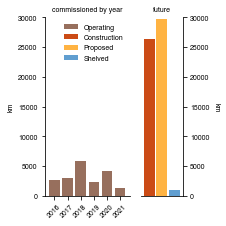

In [112]:
country = 'China'

font_size = 7
ytop = 30000
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_chi.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_chi.sum(), -2)))+" km total\noperating", x=0.1, y=0.5, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

### India

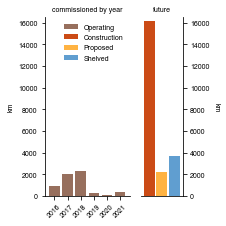

In [113]:
country = 'India'

font_size = 7
ytop = 16500
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_ind.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_ind.sum(), -2)))+" km total\noperating", x=0.1, y=0.5, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

### USA

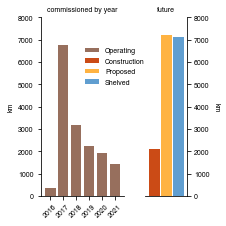

In [114]:
country = 'USA'

font_size = 7
ytop = 8000
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_usa.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_usa.sum(), -2)))+" km total\noperating", x=0.4, y=0.5, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False, loc=[0.5,0.6])#, bbox=ax.transAxes)

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

### Russia

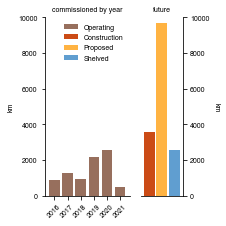

In [115]:
country = 'Russia'

font_size = 7
ytop = 10000
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_rus.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_rus.sum(), -2)))+" km total\noperating", x=0.1, y=0.5, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

### Australia

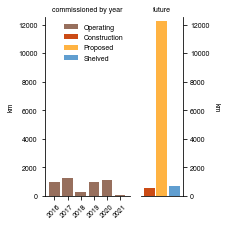

In [116]:
country = 'Australia'

font_size = 7
ytop = 12500
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_aus.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_aus.sum(), -2)))+" km total\noperating", x=0.1, y=0.5, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

### Brazil

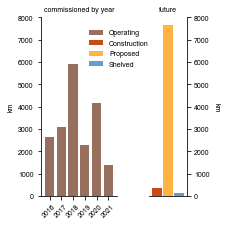

In [117]:
country = 'Brazil'

font_size = 7
ytop = 8000
ytop2 = ytop

fig = mp.figure(figsize=(3.25,3.25))

widths=[6,3]
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths)
ax = fig.add_subplot(spec[0,0])

ax.bar(pipes_started_sum_chi.index[-7:-1], pipes_started_sum_chi.values[-7:-1],
       color=tracker_operating, label='Operating')
ax_h, ax_l = ax.get_legend_handles_labels()

ax.tick_params(labelsize=font_size)
ax.tick_params('x', rotation=45)
ax.set_xticks(range(2016,2022))
#ax.set_xlabel('start year', size=font_size)
ax.set_ylabel('km', size=font_size)

ax.set_xlim(2015.25, 2021.75)
ax.set_ylim(0, ytop)
#ax.text(s="{:,}".format(int(round(pipes_started_sum_bra.sum(), -3)))+" km total\noperating", x=0.6, y=0.7, 
#        ha='left', va='top', transform=ax.transAxes, fontsize=font_size, alpha=0.75)

ax.set_title('commissioned by year in '+country, size=font_size)

# ********************************************************************************

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylim(0, ytop2)
ax2.set_xlim(0.25,3.75)
xvals = [1,2,3]

#colors = [solar_orange, solar_yellow, '0.75']
colors = [tracker_construction, tracker_proposed, tracker_shelved]
status = ['Construction', 'Proposed', 'Shelved']
ax2_list = []
for x,c,s in zip(xvals,colors,status):
    ax2_list.append(ax2.bar(x, km_by_country_df.loc[country][s],
             width=0.9, color=c, label=s))

ax_h, ax_l = ax.get_legend_handles_labels()
ax2_h, ax2_l = ax2.get_legend_handles_labels()

ax2.set_xticklabels([])
ax2.tick_params(labelsize=font_size)
ax2.set_xticks([])

ax2.yaxis.tick_right()
ax2.set_ylabel('km', fontsize=font_size, rotation=-90, labelpad=10)
ax2.yaxis.set_label_position('right')

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False)

axpos = ax.get_position()
ax2pos = ax2.get_position()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('commissioned by year', fontsize=font_size)
ax2.set_title('future', fontsize=font_size)

ax.legend(handles=ax_h+ax2_h, fontsize=font_size, frameon=False, loc=[0.6,0.7])

fig.tight_layout()#w_pad=0.05)#, hspace=None)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.png', bbox_inches='tight', transparent=True, dpi=600)
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_km-by-start-year-with-future-'+country+'.pdf', bbox_inches='tight', transparent=True)

# top 20 countries proposed+construction

In [118]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

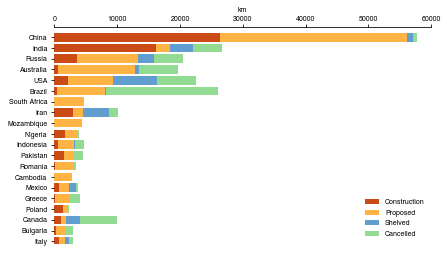

In [119]:
font_size = 7
fig = mp.figure(figsize=(6.75,4))
nbars=20

country_order = km_by_country_df.index[:nbars][::-1]

ax = fig.add_subplot(111)

ax.barh(numpy.arange(nbars), 
        km_by_country_df.loc[country_order]['Construction'].values, 
        facecolor=tracker_construction,#solar_orange, 
        label='Construction')

ax.barh(numpy.arange(nbars), 
        km_by_country_df.loc[country_order]['Proposed'].values, 
        left=km_by_country_df.loc[country_order]['Construction'].values, 
        facecolor=tracker_proposed,#solar_yellow, 
        label='Proposed')

ax.barh(numpy.arange(nbars), 
        km_by_country_df.loc[country_order]['Shelved'].values, 
        left=km_by_country_df.loc[country_order][['Proposed','Construction']].sum(axis=1).values, 
        facecolor=tracker_shelved,#'0.75', 
        label='Shelved')

ax.barh(numpy.arange(nbars), 
        km_by_country_df.loc[country_order]['Cancelled'].values, 
        left=km_by_country_df.loc[country_order][['Proposed','Construction','Shelved']].sum(axis=1).values, 
        facecolor=tracker_cancelled,#'0.9', 
        label='Cancelled')

ax.set_yticks(numpy.arange(nbars))
ax.set_yticklabels(km_by_country_df.index[:nbars][::-1])
ax.tick_params(labelsize=font_size)
ax.tick_params('x', pad=0)
ax.set_xlim(0,60000)
#ax.set_ylim(-.75,19.75)
ax.set_ylim(-.25,20)
ax.set_xlabel('km', size=font_size)#, labelpad=10)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.legend(fontsize=font_size, frameon=False, loc='lower right')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#mp.savefig('saved-figures/Gas-Pipelines-Report-2022_top-20-countries.pdf', bbox_inches='tight', transparent=True)

#adjust_spines(ax, ['top'])
    
mp.savefig('saved-figures/Gas-Pipelines-Report-2022_top-20-countries.png',
           bbox_inches='tight', 
           transparent=True,
           dpi=600)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_top-20-countries.pdf',
           bbox_inches='tight', 
           transparent=True)

In [120]:
# ratio of China to India
km_by_country_df.loc['China']['Proposed+Construction']/km_by_country_df.loc['India']['Proposed+Construction']

3.051746405147723

# cost estimates (pipeline cost per km)

## looking for cost outliers

In [121]:
outliers_projectids = ['P2509','P0173','P1297','P0174','P3188','P2551','P1382','P0477']

#P1382 - grenada to trinidad an tobago - underwater, not really a formalized route yet, skipping
#P0477 - South Valley Pipeline (egypt) - just seems too high to make sense
#P3174 - Off-shore Gas Pipeline (all underwater, not quite representative?)

In [122]:
#pipes_cost_outliers_df = pipes_df[(pipes_df['Fuel']=='Gas') & (pipes_df['Countries'].str.contains('India'))]
pipes_cost_outliers_df = pipes_df_orig.copy()[(pipes_df_orig['Fuel']=='Gas')]
pipes_cost_outliers_df = pipes_cost_outliers_df[~pipes_cost_outliers_df.ProjectID.isin(outliers_projectids)]

## costs - remove outliers

In [123]:
# pull out only pipelines that have a KNOWN length AND a cost
country_ratios_with_length_and_cost_df = country_ratios_df.copy()[(country_ratios_df['Fuel']=='Gas') & 
                                    (country_ratios_df['CostMergedUSDPerKm'].notna()) & 
                                    (country_ratios_df['LengthKnownKmByCountry'].notna()) &
                                    (country_ratios_df['LengthKnownKm']!=0)
                                   ]
country_ratios_with_length_and_cost_df = country_ratios_with_length_and_cost_df[~country_ratios_with_length_and_cost_df.ProjectID.isin(outliers_projectids)]

### global mean value

In [124]:
country_ratios_with_length_and_cost_df['CostMergedUSDPerKm'].drop_duplicates().mean()

3161566.478623595

### calculate regional costs

In [102]:
pipes_gas_costs_region_df = pandas.DataFrame(0, index=region_list, columns=['CostUSDPerKm','NumberOfCosts','NumberOfLengths'])

for region in region_list:
    print(region)
    country_ratios_region_df = country_ratios_with_length_and_cost_df[country_ratios_with_length_and_cost_df['Region']==region]
    pipes_gas_costs_region_df.loc[region]['CostUSDPerKm'] = country_ratios_region_df['CostMergedUSDPerKm'].mean()
    pipes_gas_costs_region_df.loc[region]['NumberOfCosts'] = list(set(country_ratios_region_df['ProjectID'])).__len__()
    pipes_gas_costs_region_df.loc[region]['NumberOfLengths'] = list(set(country_ratios_region_df['ProjectID'])).__len__()
    

Australia and New Zealand
East Asia
Eurasia
Europe
Latin America and the Caribbean
Middle East and North Africa
North America
SE Asia
South Asia
Sub-Saharan Africa


### table for methodology with regional cost info

In [103]:
pipes_gas_costs_region_df

,CostUSDPerKm,NumberOfCosts,NumberOfLengths
Australia and New Zealand,1271295,11,11
East Asia,1693736,60,60
Eurasia,3878476,18,18
Europe,2980665,83,83
Latin America and the Caribbean,2798030,24,24
Middle East and North Africa,2558775,15,15
North America,5130381,133,133
SE Asia,2134476,9,9
South Asia,1147718,19,19
Sub-Saharan Africa,3860864,6,6


### calculate country-level costs

In [104]:
#country_list_for_costs = sorted(list(set(country_ratios_with_length_and_cost_df['Country'])))
pipes_gas_costs_country_df = pandas.DataFrame(0, index=country_list, columns=['CostUSDPerKm','NumberOfCosts','NumberOfLengths'])

for country in country_list:#_for_costs:
    #print(country)
    country_ratios_country_df = country_ratios_with_length_and_cost_df[country_ratios_with_length_and_cost_df['Country']==country]
    pipes_gas_costs_country_df.loc[country,'CostUSDPerKm'] = country_ratios_country_df['CostMergedUSDPerKm'].mean()
    pipes_gas_costs_country_df.loc[country,'NumberOfCosts'] = list(set(country_ratios_country_df['ProjectID'])).__len__()
    pipes_gas_costs_country_df.loc[country,'NumberOfLengths'] = list(set(country_ratios_country_df['ProjectID'])).__len__()

## for India, USA, China, Indonesia

## table for regional totals

In [105]:
if 'Total' in km_by_region_df.index:
    km_by_region_df.drop(index='Total', inplace=True)   
    total = km_by_region_df.sum(axis=0)
    total.name='Total'
    km_by_region_df = km_by_region_df.append(total)

else:
    total = km_by_region_df.sum(axis=0)
    total.name='Total'
    km_by_region_df = km_by_region_df.append(total)

km_by_region_df

,Proposed,Construction,Proposed+Construction,Shelved,Cancelled,Operating,Idle,Mothballed,Retired
East Asia,"32,420.1","26,347.7","58,767.8","1,044.0","1,044.1","92,429.1",0.0,0.0,41.0
South Asia,"4,091.0","17,859.7","21,950.7","6,017.7","6,143.8","20,585.8",0.0,0.0,35.0
Europe,"14,832.9","5,290.6","20,123.5","1,247.9","15,805.3","116,899.3",0.0,0.0,"1,080.0"
Sub-Saharan Africa,"14,048.0","5,517.9","19,565.9","1,633.2",288.2,"13,550.9",0.0,0.0,0.0
Eurasia,"11,689.3","4,719.0","16,408.3","2,556.8","6,644.1","140,257.5",0.0,193.0,"2,551.9"
North America,"9,526.9","3,897.7","13,424.6","10,445.8","12,432.1","418,631.0",516.0,0.0,0.0
Australia and New Zealand,"12,369.5",580.0,"12,949.5",682.0,"6,208.5","30,993.0",0.0,0.0,0.0
Latin America and the Caribbean,"11,364.0",541.0,"11,905.0","3,453.0","22,161.3","43,412.5",0.0,224.0,0.0
Middle East and North Africa,"5,028.8","5,014.2","10,043.1","7,178.7","3,704.5","33,369.8","1,200.0",0.0,39.3
SE Asia,"7,106.4","1,121.0","8,227.4","2,630.4","3,180.8","15,839.9",0.0,0.0,0.0


## table for km by country

In [53]:
if 'Total' in km_by_country_df.index:
    km_by_country_df.drop(index='Total', inplace=True)   
    total = km_by_country_df.sum(axis=0)
    total.name='Total'
    km_by_country_df = km_by_country_df.append(total)

else:
    total = km_by_country_df.sum(axis=0)
    total.name='Total'
    km_by_country_df = km_by_country_df.append(total)

km_by_country_df.to_excel('saved-tables/GGIT-km-by-country.xlsx')

## table for stranded asset calculations

In [106]:
pandas.options.display.float_format = '{:,.1f}'.format
#km_by_region_df.sort_index(inplace=True)
#indices_without_total = list(km_by_region_df.index)
#if 'Total' in indices_without_total:
#    indices_without_total.remove('Total')

capex_estimates_df = km_by_region_df.loc[region_list].multiply(pipes_gas_costs_region_df['CostUSDPerKm'].values, axis=0) / 1e9

capex_estimates_df.sort_values('Proposed+Construction', ascending=False, inplace=True)

total = capex_estimates_df.sum(axis=0)
total.name='Total'
capex_estimates_df = capex_estimates_df.append(total)

capex_estimates_df

,Proposed,Construction,Proposed+Construction,Shelved,Cancelled,Operating,Idle,Mothballed,Retired
East Asia,54.9,44.6,99.5,1.8,1.8,156.6,0.0,0.0,0.1
Sub-Saharan Africa,54.2,21.3,75.5,6.3,1.1,52.3,0.0,0.0,0.0
North America,48.9,20.0,68.9,53.6,63.8,"2,147.7",2.6,0.0,0.0
Eurasia,45.3,18.3,63.6,9.9,25.8,544.0,0.0,0.7,9.9
Europe,44.2,15.8,60.0,3.7,47.1,348.4,0.0,0.0,3.2
Latin America and the Caribbean,31.8,1.5,33.3,9.7,62.0,121.5,0.0,0.6,0.0
Middle East and North Africa,12.9,12.8,25.7,18.4,9.5,85.4,3.1,0.0,0.1
South Asia,4.7,20.5,25.2,6.9,7.1,23.6,0.0,0.0,0.0
SE Asia,15.2,2.4,17.6,5.6,6.8,33.8,0.0,0.0,0.0
Australia and New Zealand,15.7,0.7,16.5,0.9,7.9,39.4,0.0,0.0,0.0


## print out country-level stranded assets

In [107]:
pandas.options.display.float_format = '{:,.1f}'.format

these_countries = ['China','India','USA','Russia','Australia','Brazil']

for cty in these_countries:
    print(cty)
    print(km_by_country_df.loc[cty]['Proposed+Construction'], ' km in development')
    print(pipes_gas_costs_country_df.loc[cty])
    print(pipes_gas_costs_country_df.loc[cty]['CostUSDPerKm']*km_by_country_df.loc[cty]/1e9)
    print()

China
56120.06  km in development
CostUSDPerKm      1,588,286.4
NumberOfCosts            58.0
NumberOfLengths          58.0
Name: China, dtype: float64
Proposed                 47.3
Construction             41.8
Proposed+Construction    89.1
Shelved                   1.6
Cancelled                 0.9
Operating               138.8
Idle                      0.0
Mothballed                0.0
Retired                   0.0
Name: China, dtype: float64

India
18389.489999999998  km in development
CostUSDPerKm      799,179.6
NumberOfCosts          11.0
NumberOfLengths        11.0
Name: India, dtype: float64
Proposed                 1.8
Construction            12.9
Proposed+Construction   14.7
Shelved                  2.9
Cancelled                3.7
Operating               13.3
Idle                     0.0
Mothballed               0.0
Retired                  0.0
Name: India, dtype: float64

USA
9294.6  km in development
CostUSDPerKm      5,165,922.1
NumberOfCosts           110.0
NumberOfLengt

## country-level table for stranded asset calculations

In [108]:
pandas.options.display.float_format = '{:,.1f}'.format
#km_by_region_df.sort_index(inplace=True)
#indices_without_total = list(km_by_region_df.index)
#if 'Total' in indices_without_total:
#    indices_without_total.remove('Total')

capex_estimates_country_df = km_by_region_df.loc[region_list].multiply(pipes_gas_costs_region_df['CostUSDPerKm'].values, axis=0) / 1e9

if 'Total' in capex_estimates_df.index:
    capex_estimates_df.drop(index='Total', inplace=True)   
    total = capex_estimates_df.sum(axis=0)
    total.name='Total'
    capex_estimates_df = capex_estimates_df.append(total)

else:
    total = capex_estimates_df.sum(axis=0)
    total.name='Total'
    capex_estimates_df = capex_estimates_df.append(total)

capex_estimates_df

,Proposed,Construction,Proposed+Construction,Shelved,Cancelled,Operating,Idle,Mothballed,Retired
East Asia,54.9,44.6,99.5,1.8,1.8,156.6,0.0,0.0,0.1
Sub-Saharan Africa,54.2,21.3,75.5,6.3,1.1,52.3,0.0,0.0,0.0
North America,48.9,20.0,68.9,53.6,63.8,"2,147.7",2.6,0.0,0.0
Eurasia,45.3,18.3,63.6,9.9,25.8,544.0,0.0,0.7,9.9
Europe,44.2,15.8,60.0,3.7,47.1,348.4,0.0,0.0,3.2
Latin America and the Caribbean,31.8,1.5,33.3,9.7,62.0,121.5,0.0,0.6,0.0
Middle East and North Africa,12.9,12.8,25.7,18.4,9.5,85.4,3.1,0.0,0.1
South Asia,4.7,20.5,25.2,6.9,7.1,23.6,0.0,0.0,0.0
SE Asia,15.2,2.4,17.6,5.6,6.8,33.8,0.0,0.0,0.0
Australia and New Zealand,15.7,0.7,16.5,0.9,7.9,39.4,0.0,0.0,0.0


## pie chart for stranded assets

In [159]:
capex_estimates_df.sort_values('Proposed+Construction', ascending=False)[1:]

,Proposed,Construction,Proposed+Construction,Shelved,Cancelled,Operating,Idle,Mothballed,Retired
East Asia,54.9,44.6,99.5,1.8,1.8,156.6,0.0,0.0,0.1
Sub-Saharan Africa,54.2,21.3,75.5,6.3,1.1,52.3,0.0,0.0,0.0
North America,48.9,20.0,68.9,53.6,63.8,"2,147.7",2.6,0.0,0.0
Eurasia,45.3,18.3,63.6,9.9,25.8,544.0,0.0,0.7,9.9
Europe,44.2,15.8,60.0,3.7,47.1,348.4,0.0,0.0,3.2
Latin America and the Caribbean,31.8,1.5,33.3,9.7,62.0,121.5,0.0,0.6,0.0
Middle East and North Africa,12.9,12.8,25.7,18.4,9.5,85.4,3.1,0.0,0.1
South Asia,4.7,20.5,25.2,6.9,7.1,23.6,0.0,0.0,0.0
SE Asia,15.2,2.4,17.6,5.6,6.8,33.8,0.0,0.0,0.0
Australia and New Zealand,15.7,0.7,16.5,0.9,7.9,39.4,0.0,0.0,0.0


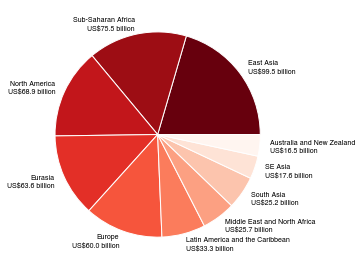

In [125]:
font_size=7

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cmap = mp.get_cmap('Reds')

pie_vals = capex_estimates_df.sort_values('Proposed+Construction', ascending=False)['Proposed+Construction'][1:]
pie_labels = capex_estimates_df.sort_values('Proposed+Construction', ascending=False).index[1:]
pie_labels_dollars = capex_estimates_df.sort_values('Proposed+Construction', ascending=False)['Proposed+Construction'].apply(lambda x: f'\nUS${x:.1f} billion')[1:]

pie_labels = [i+j for i,j in zip(pie_labels, pie_labels_dollars)]

ax.pie(pie_vals, 
       labels=pie_labels,
       colors=cmap(numpy.linspace(0,1,pie_vals.size))[::-1],
       wedgeprops=dict(edgecolor='1'),
       textprops={'fontsize':font_size})

ax.tick_params(labelsize=font_size)

fig.tight_layout()

#mp.savefig('saved-figures/Gas-Pipelines-Report-2022_pie-graph.pdf', bbox_inches='tight', transparent=True)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_pie-graph.png', 
           bbox_inches='tight', 
           transparent=True,
           dpi=600)

mp.savefig('saved-figures/Gas-Pipelines-Report-2022_pie-graph.pdf', 
           bbox_inches='tight', 
           transparent=True)


In [161]:
capex_estimates_df.sort_values('Proposed+Construction', ascending=False)['Proposed+Construction'].apply(lambda x: f'US${x:.2f} billion')[1:]

East Asia                          US$99.54 billion
Sub-Saharan Africa                 US$75.54 billion
North America                      US$68.87 billion
Eurasia                            US$63.64 billion
Europe                             US$59.98 billion
Latin America and the Caribbean    US$33.31 billion
Middle East and North Africa       US$25.70 billion
South Asia                         US$25.19 billion
SE Asia                            US$17.56 billion
Australia and New Zealand          US$16.46 billion
Name: Proposed+Construction, dtype: object

In [162]:
capex_estimates_df.sort_values('Proposed+Construction', ascending=False)['Proposed+Construction'][1:]

East Asia                         99.5
Sub-Saharan Africa                75.5
North America                     68.9
Eurasia                           63.6
Europe                            60.0
Latin America and the Caribbean   33.3
Middle East and North Africa      25.7
South Asia                        25.2
SE Asia                           17.6
Australia and New Zealand         16.5
Name: Proposed+Construction, dtype: float64

In [163]:
capex_estimates_df.sort_values('Proposed+Construction', ascending=False).index[1:]

Index(['East Asia', 'Sub-Saharan Africa', 'North America', 'Eurasia', 'Europe',
       'Latin America and the Caribbean', 'Middle East and North Africa',
       'South Asia', 'SE Asia', 'Australia and New Zealand'],
      dtype='object')

### amount already being constructed

In [164]:
#km
km_by_country_total = km_by_country_df.sum(axis=0)
km_by_country_total['Construction']/km_by_country_total['Proposed+Construction']

0.3666044857648383

In [165]:
total['Construction']/total['Proposed+Construction']

0.32517736715780604

# numbers for report

## km of pipeline with 2022, 2023 start years

In [166]:
print(pipes_indev_startyear.loc['Construction',2022],
      pipes_indev_startyear.loc['Construction',2023])

print(pipes_indev_startyear.loc['Proposed',2022],
      pipes_indev_startyear.loc['Proposed',2023])

36824.76000000001 10453.9
7785.45 12241.850000000002


## km of gas pipelines globally in development

note this doesn't match up exactly with regional length calculations

In [167]:
pipes_df_calc = pipes_df_orig.copy()
pipes_df_calc.replace('--',numpy.nan,inplace=True)
pipes_df_calc[(pipes_df_calc['Status'].isin(['Proposed','Construction'])) &
        (pipes_df_calc['Fuel']=='Gas')]['LengthMergedKm'].sum()

194025.74000000005

In [168]:
regional_km_sums_df = pandas.DataFrame(index=region_list, columns=status_list)

for status in status_list:
    regional_km_sums_df[status] = pipes_df_calc[(pipes_df_calc['Fuel']=='Gas') &
                                                (pipes_df_calc['Status']==status)].groupby('StartRegion')['LengthMergedKm'].sum()

regional_km_sums_df['P+C'] = regional_km_sums_df[['Proposed','Construction']].sum(axis=1)
total_row = regional_km_sums_df.sum(axis=0)
total_row.name = 'Total'
#regional_km_sums_df.append(total_row)

## country shares analysis

In [169]:
country_ratios_df[(country_ratios_df['Status'].isin(['Proposed','Construction'])) &
               (country_ratios_df['Fuel']=='Gas')]['MergedKmByCountry'].sum()

193365.90999999997

### China's percent of total

In [170]:
km_by_country_df.loc['China']['Proposed+Construction']/km_by_country_df['Proposed+Construction'].sum(axis=0)

0.14511363455947326

In [171]:
km_by_country_df[:6]['Proposed+Construction'].sum(axis=0)/km_by_country_df['Proposed+Construction'].sum(axis=0)

0.3048366177885233

In [172]:
km_by_country_df[:20]['Proposed+Construction'].sum(axis=0)/km_by_country_df['Proposed+Construction'].sum(axis=0)

0.41082409510549195

## number of delayed km from 2021 to 2022

In [173]:
pipes_delays_df = pipes_df_orig.copy()
pipes_delays_df = pipes_delays_df[(pipes_delays_df['Fuel']=='Gas') &
                                  (pipes_delays_df['Delayed']=='Yes') &
                                   (pipes_delays_df['StartYearEarliest']==2022)]

pipes_delays_df.groupby('Status')['LengthMergedKm'].sum()

Status
Construction   24,989.9
Proposed        3,904.8
Name: LengthMergedKm, dtype: object

In [174]:
pipes_delays_df = pipes_df_orig.copy()
pipes_delays_df = pipes_delays_df[(pipes_delays_df['Fuel']=='Gas') &
                                  (pipes_delays_df['Delayed']=='Yes') &
                                   (pipes_delays_df['StartYearEarliest']==2022) &
                                   (pipes_delays_df['DelayType']=='Presumed')]

pipes_delays_df.groupby('Status')['LengthMergedKm'].sum()

Status
Construction   22,206.9
Proposed        3,817.8
Name: LengthMergedKm, dtype: object

## num of projects in database with nonzero length

In [265]:
no_route_types = [#'Unavailable',
                  'Capacity expansion only',
                  'Bidirectionality upgrade only']#,
                  #'Short route (< 100 km)',
                  #'N/A']

### isolate anything with a nonzero length in database

In [272]:
numprojects = pipes_df_orig.copy()
numprojects = numprojects[~numprojects['Route'].isin(no_route_types)]
numprojects = numprojects[(numprojects['Fuel']=='Gas') &
                          (numprojects['Status'].isin(['Proposed','Construction']))]

In [273]:
print(numprojects.shape)
print(numprojects['LengthMergedKm'].median())

(511, 75)
160.0


In [268]:
numprojects.groupby(['StartYearEarliest','Status'])['LengthMergedKm'].sum()

StartYearEarliest  Status      
2019               Proposed          450.0
2022               Construction   36,824.8
                   Proposed        7,785.4
2023               Construction   10,453.9
                   Proposed       12,241.9
2024               Construction    3,326.0
                   Proposed        3,698.2
2025               Construction      759.0
                   Proposed       11,781.9
2026               Proposed          949.0
2027               Proposed        2,270.0
2028               Proposed        5,006.0
2029               Proposed          962.0
2030               Proposed            8.0
2034               Proposed          255.0
2035               Proposed          110.0
2046               Proposed        5,660.0
Name: LengthMergedKm, dtype: object

#### check that it's the right thing

In [269]:
numprojects['LengthMergedKm'].sum()

194025.74000000005

### calc capacity expansion only

In [270]:
numprojects_capexp = pipes_df_orig.copy()
numprojects_capexp = numprojects_capexp[numprojects_capexp['Route'].isin(no_route_types)]
numprojects_capexp = numprojects_capexp[(numprojects_capexp['Fuel']=='Gas') &
                          (numprojects_capexp['Status'].isin(['Proposed','Construction']))]

In [271]:
numprojects_capexp.shape

(50, 75)

(-100.0, 2000.0)

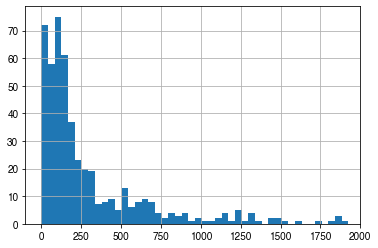

In [241]:
ax = numprojects['LengthMergedKm'].hist(bins=200)#mean()
ax.set_xlim(-100,2000)

## global km of pipeline by start year

In [242]:
pipes_started_sum

StartYearEarliest
1983   1,117.0
1989     340.0
1995     600.0
1999      80.0
2004   2,455.0
2006     677.0
2011     196.0
2014     100.0
2015     533.0
2016     500.0
2017     128.0
2019     245.0
2021     412.0
Name: LengthMergedKm, dtype: object

In [243]:
#pipes_indev_startyear = pipes_df_orig.copy()
#pipes_indev_startyear = pipes_indev_startyear[(pipes_indev_startyear['Status'].isin(['Proposed','Construction','Shelved'])) &
#                                              (pipes_indev_startyear['Fuel']=='Gas')]
#pipes_indev_startyear = pipes_indev_startyear.groupby(['Status','StartYearEarliest'])['LengthMergedKm'].sum()
pipes_indev_startyear_df = pipes_indev_startyear.to_frame()

In [244]:
pipes_2023_2030_subset_df = pipes_indev_startyear_df.query('StartYearEarliest<2031 and StartYearEarliest>2022')
#pipes_2023_2030_subset_df.query('Status==Construction or Status==Proposed')
pipes_2023_2030_subset_df.groupby('Status').sum().loc[['Construction','Proposed']].sum()


LengthMergedKm   51,455.9
dtype: float64

### sum of anything 2023 onward that is in construction or proposed

In [245]:
#pipes_indev_startyear_df.query("Status=='Construction' or Status=='Proposed'")
pipes_indev_startyear_df.query("(Status=='Construction' or Status=='Proposed') and StartYearEarliest>2022").sum()

LengthMergedKm   57,480.9
dtype: object

In [246]:
51754.9/57779.9

0.8957249839477051

# methodology stats

In [247]:
missing_route_types = ['Unavailable',
                       #'Capacity expansion only',
                       #'Bidirectionality upgrade only',
                       'Short route (< 100 km)']#,
                       #'N/A']

In [259]:
pipes_df_orig.shape

(3255, 75)

In [249]:
pipes_df_orig.shape

(3255, 75)

In [250]:
pipes_df_orig['Route'].isin(missing_route_types).sum()

136

In [255]:
pipes_df_orig.loc[pipes_df_orig['Route'].isin(missing_route_types), 'LengthMergedKm'].isnull().sum()

21

In [257]:
pipes_df_orig['Route'].isin(missing_route_types).sum()-pipes_df_orig.loc[pipes_df_orig['Route'].isin(missing_route_types), 'LengthMergedKm'].isnull().sum()

115

In [225]:
pipes_df_orig['Route']==['Capacity expansion only', 'Bidirectionality upgrade only', 'Short route (< 100 km)']

0       52.669720,-111.31072:51.915156,-109.13337:50.4...
1       53.572938,-113.34182:53.904338,-112.91198:54.5...
2       48.3119712,-101.73614:48.9982400,-102.26074:49...
3       53.711746,-113.20655:45.398450,-95.097656:44.0...
4       41.583607,-87.513656:38.891033,-90.131835:37.3...
                              ...                        
3250    -26.693663,149.186142:-26.693768,149.186127:-2...
3251    -28.292648,118.537533:-28.291703,118.538255:-2...
3252    -31.190878,121.627642:-31.191294,121.627741:-3...
3253    -21.50219,121.853422:-21.506172,121.85201:-21....
3254    -31.556791,115.956742:-31.556701,115.948918:-3...
Name: Route, Length: 3255, dtype: object

In [ ]:
# num routes
numprojects = pipes_df_orig.copy()
numprojects = numprojects[~numprojects['Route'].isin(no_route_types)]
numprojects = numprojects[(numprojects['Fuel']=='Gas') &
                          (numprojects['Status'].isin(['Proposed','Construction']))]